# Python Setup

In [32]:
import pandas as pd
import requests
import json
from tqdm.auto import tqdm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

api_key = '50a24142'

# Read in list of films

In [39]:
df = pd.read_csv('../data/sight_sound_rank.tsv', sep='\t', nrows=800)

# Query IMDb API

In [92]:
output = pd.DataFrame()

for i in tqdm(range(df.shape[0])):
    
    film = df['movie'][i]
    year = df['year'][i]    
    
    url = 'http://www.omdbapi.com/?t={}&y={}&plot=full&apikey={}'.format(film, year, api_key)
    resp = requests.get(url)
    info = json.loads(resp.text)
    
    if info['Response'] == 'False':
        print("{} ({}) not found".format(film, year))
    
    if info['Response'] == 'True':
        
        for rating in info['Ratings']:
            if rating['Source']=='Rotten Tomatoes':
                info['RottenTomatoesRating'] = rating['Value']
            elif rating['Source']=='Metacritic':
                info['MetacriticRating'] = rating['Value']
            elif (rating['Source']=='Internet Movie Database') & ('imdbRating' not in list(info.keys())):
                info['imdbRating'] = rating['Value']

        for var in ['Ratings', 'Poster', 'Website', 'Response', 'DVD', 'Metascore']:
            if var in list(info.keys()):
                del info[var]

        output = pd.concat([output, pd.DataFrame(info, index=[0])], axis=0, sort=False).reset_index(drop=True)

Sunrise: A Song of Two Humans (1927) not found
Fanny and Alexander (Television Version) (1983) not found
Ali: Fear Eats the Soul (1973) not found
Touki Bouki (1973) not found
Grand Illusion (1937) not found
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) not found
Los olvidados (1950) not found
Cries and Whispers (1972) not found
NOW SHOWINGDay of Wrath (1943) not found
The Story of the Last Chrysanthemums (1939) not found
The Texas Chainsaw Massacre (1974) not found
Where Is the Friend's Home? (1987) not found
Tale of Tales (1979) not found
I Know Where I’m Going! (1945) not found
The Green Ray (1986) not found
Nostalghia (1983) not found
The Chelsea Girls (1966) not found
Tie Xi Qu: West of the Tracks - Part 1: Rust (2002) not found
The Decalogue (1989) not found
Scenes from a Marriage (Television Version) (1973) not found
Code Unknown: Incomplete Tales of Several Journeys (2000) not found
MUBI RENTAL (2003) not found
Land Without Bread (1933) not found
Ev

In [ ]:
output['RottenTomatoesRating'] = pd.to_numeric(output['RottenTomatoesRating'].str[:-1])
output['MetacriticRating'] = pd.to_numeric(output['MetacriticRating'].str[:-4])
output['Runtime'] = pd.to_numeric(output['Runtime'].str[:-4])
output['imdbVotes'] = pd.to_numeric(output['imdbVotes'].str.replace(',', ''))

In [93]:
output.to_csv('../data/imdb_info.tsv', sep='\t', index=False)

# Sandbox

In [69]:
df = pd.read_csv('../data/imdb_info.tsv', sep='\t')

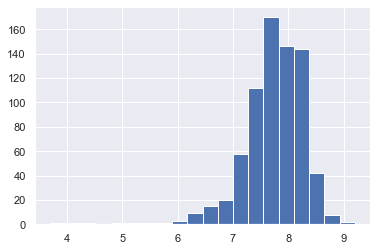

In [44]:
plt.hist(df['imdbRating'], bins=20)
plt.show()

In [70]:
df['decade'] = (np.floor(df['Year']/10)*10).astype(str).str.replace(r'\.0', 's')

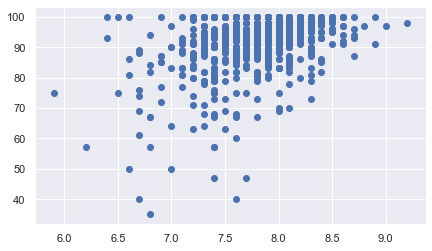

In [56]:
plt.subplots(figsize=(7,4))
plt.scatter(df['imdbRating'], df['RottenTomatoesRating'])
plt.show()

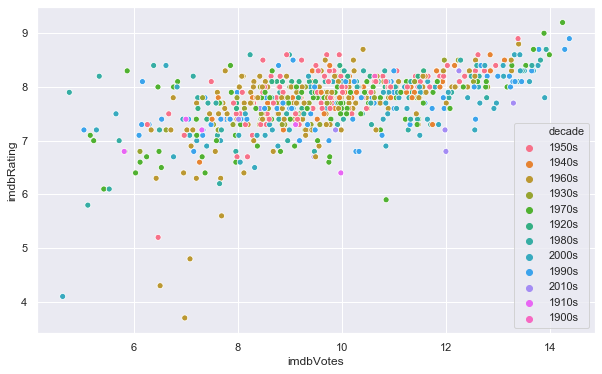

In [77]:
plt.subplots(figsize=(10,6))
sns.scatterplot(x=np.log(df['imdbVotes']), y=df['imdbRating'], hue=df['decade'])
plt.show()